# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

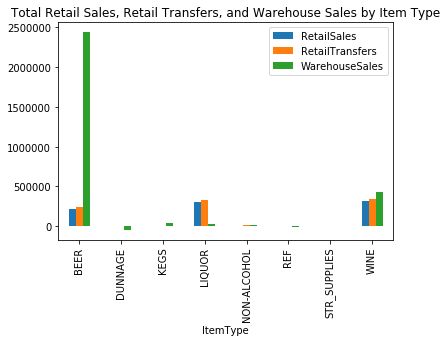

In [3]:
sales_by_item = data[["ItemType", "RetailSales", "RetailTransfers", "WarehouseSales"]].groupby(["ItemType"]).agg("sum")
sales_by_item.plot.bar(title='Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type')


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

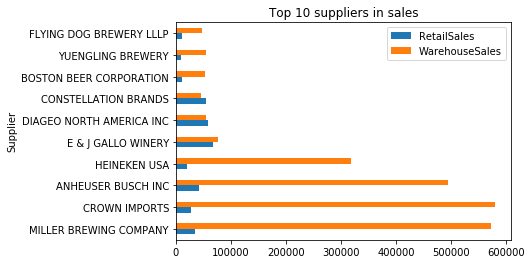

In [5]:
suppliers_sales = data[["Supplier", "RetailSales", "WarehouseSales"]].groupby(["Supplier"]).agg("sum")
suppliers_sales['TotalSales'] = suppliers_sales['RetailSales'] + suppliers_sales['WarehouseSales']
top_suppliers_sales = suppliers_sales.sort_values(by=['TotalSales'], ascending = False).head(10)
top_suppliers_sales[["RetailSales", "WarehouseSales"]].plot.barh(title='Top 10 suppliers in sales')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

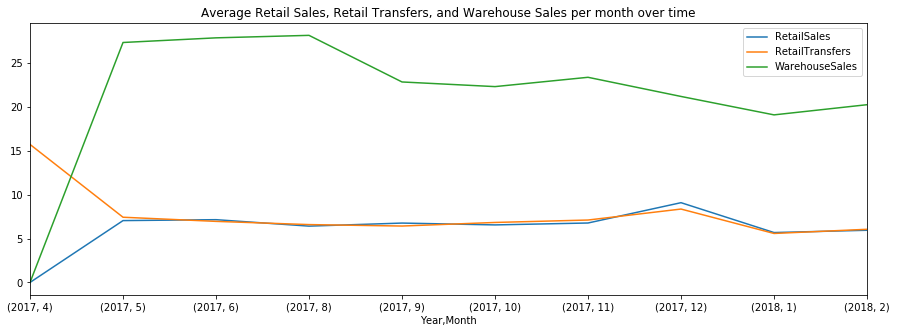

In [65]:
avg_sales = data[["Year", "Month", "RetailSales", "RetailTransfers", "WarehouseSales"]].groupby(["Year", "Month"]).agg("mean")
avg_sales.plot(title='Average Retail Sales, Retail Transfers, and Warehouse Sales per month over time', figsize = [15, 5])


## 4. Plot the same information as above but as a bar chart.

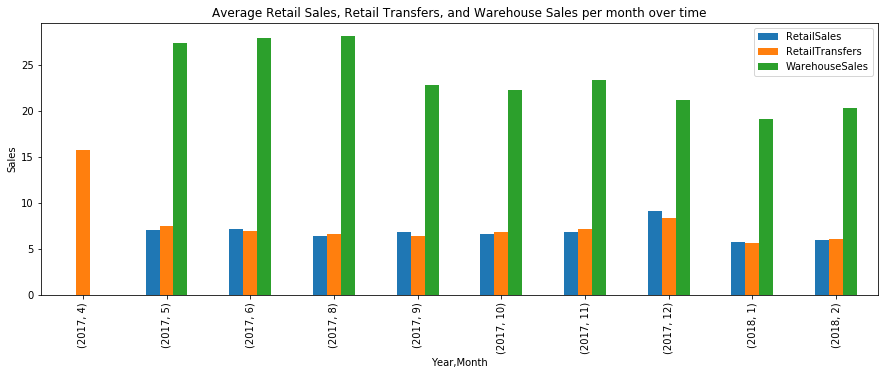

In [66]:
avg_sales.plot.bar(title='Average Retail Sales, Retail Transfers, and Warehouse Sales per month over time', figsize = [15, 5])
plt.ylabel('Sales', fontsize = 10);

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [12]:
data[["Year", "Month", "RetailSales", "ItemType"]].groupby(["Year", "Month", "ItemType"]).agg("sum").head(10)
# Con un groupby queda de la siguiente manera; no nos sirve para lo que nos piden, hay que hacer una pivot_table.

RetailSales
Year Month ItemType                 
2017 4     BEER                 0.00
           LIQUOR               0.00
           NON-ALCOHOL          0.00
           REF                  0.00
           STR_SUPPLIES         0.00
           WINE                 0.00
     5     BEER             25023.24
           LIQUOR           35123.36
           WINE             34546.89
     6     BEER             27863.26

In [13]:
# Hacemos una pivot_table:
sales_by_item = data.pivot_table(index=['Year', 'Month'], columns=['ItemType'], values=['RetailSales'], aggfunc='sum')
sales_by_item.head(10)

RetailSales                                                         \
ItemType          BEER DUNNAGE KEGS    LIQUOR NON-ALCOHOL    REF STR_SUPPLIES   
Year Month                                                                      
2017 4            0.00     NaN  NaN      0.00        0.00   0.00         0.00   
     5        25023.24     NaN  NaN  35123.36         NaN    NaN          NaN   
     6        27863.26     0.0  0.0  35035.31     1209.23  30.60        89.22   
     8        23030.13     0.0  0.0  32186.04     1091.28  19.54        77.34   
     9        23852.76     0.0  0.0  32532.32      997.11  38.88        94.64   
     10       22583.78     0.0  0.0  32491.59      945.63  22.82        84.38   
     11       23341.14     0.0  0.0  35524.77     1005.19  63.11       106.06   
     12       28822.16     0.0  0.0  49522.28     1316.44  41.21       439.64   
2018 1        16606.33     0.0  0.0  28579.87      732.25  23.66        56.94   
     2        18640.31     0.0  0.0  28852.31      812.84  41.52        47.76   

                      
ItemType        WINE  
Year Month            
2017 4          0.00  
     5      34546.89  
     6      33129.64  
     8      30707.45  
     9      32936.89  
     10     33108.76  
     11     38275.92  
     12     51492.76  
2018 1      29792.72  
     2      29409.39

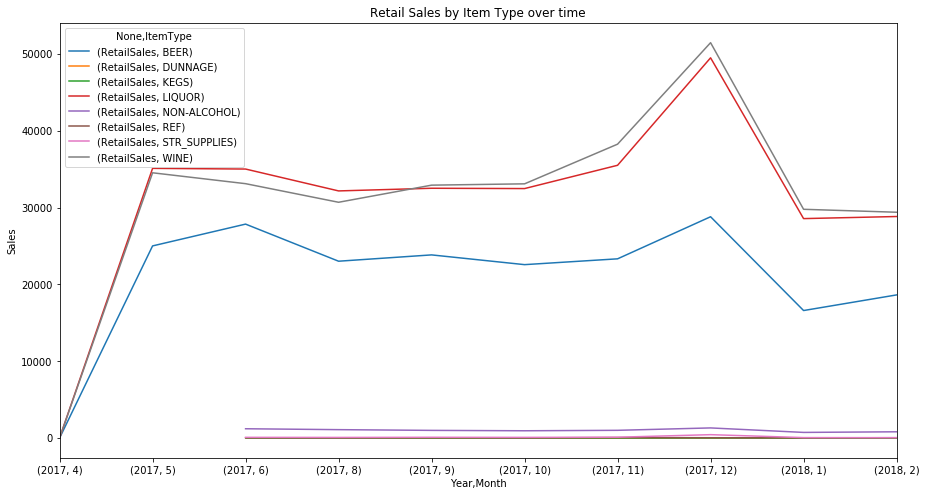

In [19]:
# Y ploteamos la pivot table en un gráfico de líneas.
sales_by_item.plot(title="Retail Sales by Item Type over time", figsize=[15,8])
plt.ylabel('Sales', fontsize = 10);

## 6. Plot the same information as above but as a bar chart.

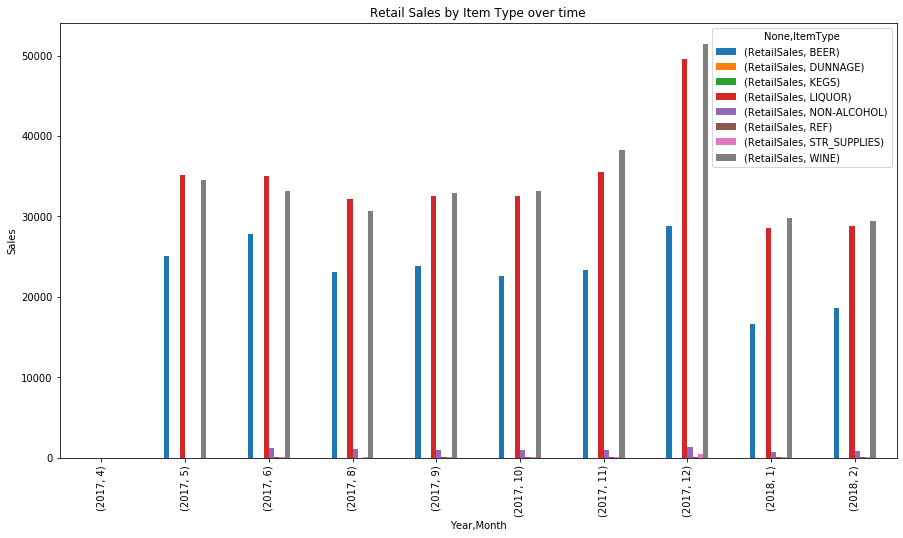

In [21]:
sales_by_item.plot.bar(title="Retail Sales by Item Type over time", figsize=[15,8])
plt.ylabel('Sales', fontsize = 10);

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

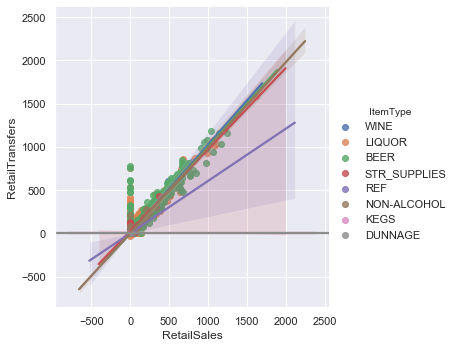

In [80]:
# Uso el lmplot que propone el ejercicio.
sns.lmplot(x='RetailSales',y='RetailTransfers', data=data, hue='ItemType')
sns.set(rc={'figure.figsize':(15,15)}) # No sé por qué no funciona el figsize con este gráfico.

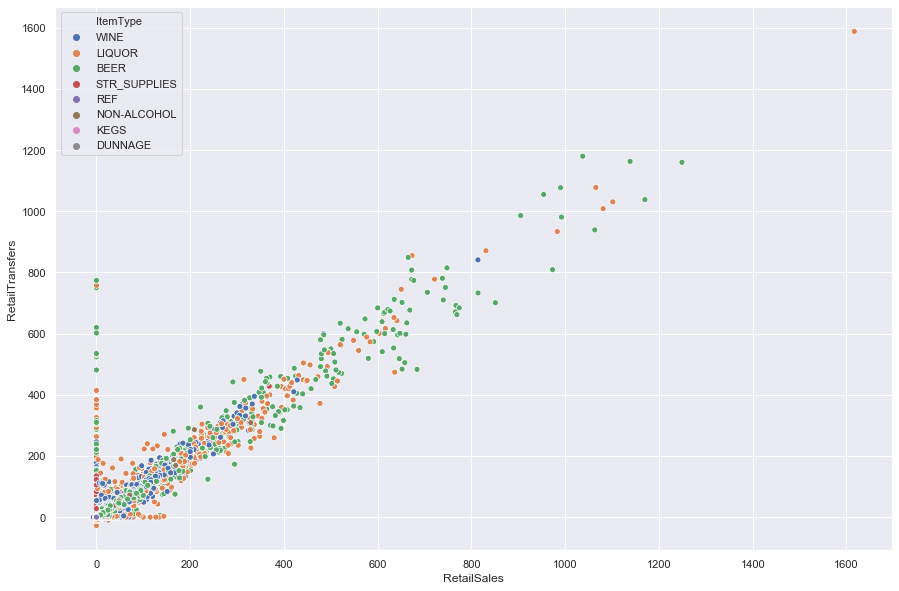

In [78]:
# Voy a probar cómo se vería con un scatter plot, sin que aparezcan las rectas de regresión.
sns.scatterplot(x='RetailSales',y='RetailTransfers', data=data, hue='ItemType')
sns.set(rc={'figure.figsize':(15,15)})

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

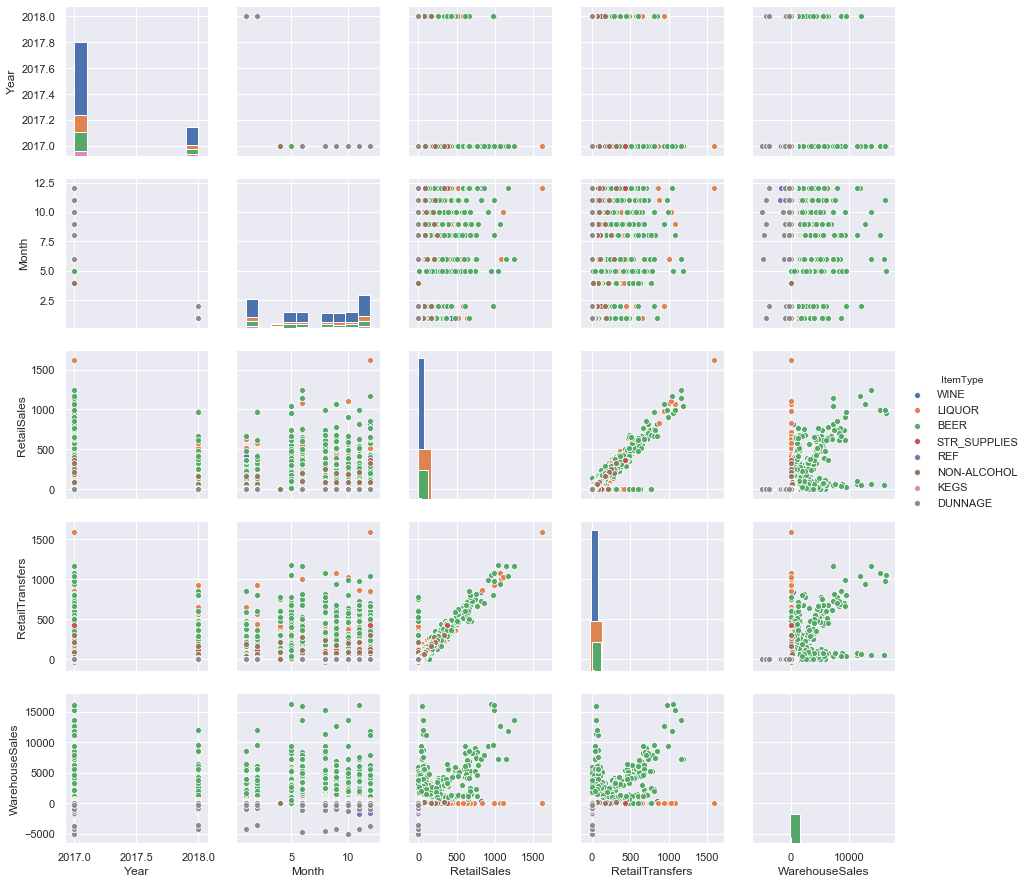

In [84]:
sns.pairplot(data,hue='ItemType',diag_kind='hist')
# Tengo que poner el diag_kind o me da error "singular matrix"